In [1]:
import numpy as np                                          #importing numpy
import pandas as pd                                         #importing pandas for data manipluation 

In [2]:
bike = pd.read_csv('https://raw.githubusercontent.com/cambridgecoding/machinelearningregression/master/data/bikes.csv')
bike.head()                                                     #top 5 rows of dataset

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [3]:
bike.shape                                                     #shape of dataset                             

(729, 5)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         729 non-null    object 
 1   temperature  729 non-null    float64
 2   humidity     729 non-null    float64
 3   windspeed    729 non-null    float64
 4   count        729 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


In [5]:
import matplotlib.pyplot as plt                                 #matplotlib for charts
import seaborn as sns                                           #seaborn for statistical charts
from datetime import datetime

In [6]:
bike['day'] = pd.to_datetime(bike.date).dt.day                               #extracting day from date
bike['Month'] = pd.to_datetime(bike.date).dt.month                           #extracting month from date
bike['Week_Day'] = pd.to_datetime(bike.date).dt.dayofweek                    #extracting week day from date
bike['Week_Day_Name'] = pd.to_datetime(bike.date).dt.day_name()              #extracting week day name from date i.e. sun, mon etc.
bike['year'] = pd.to_datetime(bike.date).dt.year                             #extracting year from date

In [7]:
bike.drop('date',axis=1,inplace=True)                                     #dropping date column

In [8]:
bike.head()

,temperature,humidity,windspeed,count,day,Month,Week_Day,Week_Day_Name,year
0,2.716070,45.715346,21.414957,120.0,3,1,0,Monday,2011
1,2.896673,54.267219,15.136882,108.0,4,1,1,Tuesday,2011
2,4.235654,45.697702,17.034578,82.0,5,1,2,Wednesday,2011
3,3.112643,50.237349,10.091568,88.0,6,1,3,Thursday,2011
4,2.723918,49.144928,15.738204,148.0,7,1,4,Friday,2011


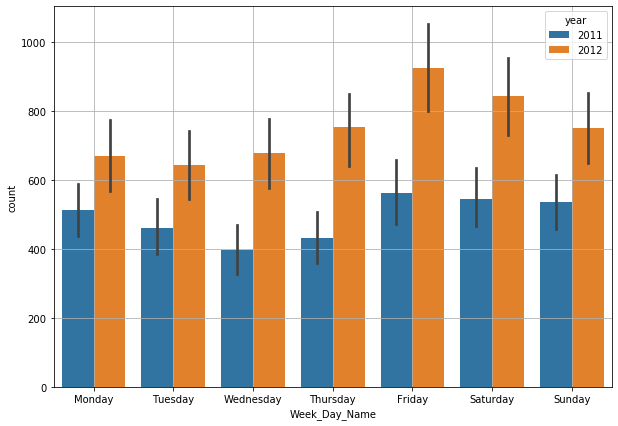

In [9]:
plt.figure(figsize=(10,7))
sns.barplot(x='Week_Day_Name',y='count',hue='year',data=bike)
plt.grid()

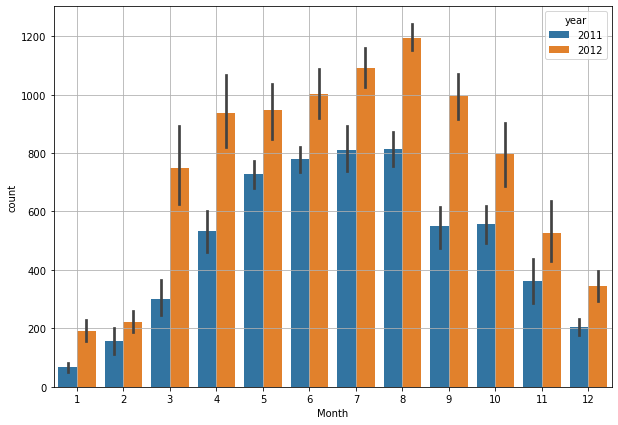

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x='Month',y='count',hue='year',data=bike)
plt.grid()

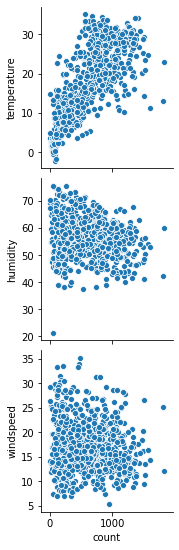

In [11]:
sns.pairplot(data=bike,x_vars='count',y_vars=['temperature','humidity','windspeed'])

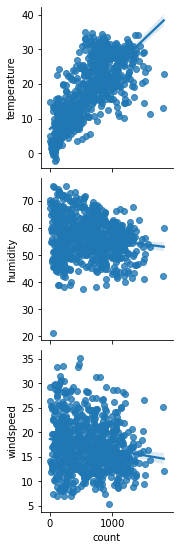

In [12]:
sns.pairplot(data=bike,x_vars='count',y_vars=['temperature','humidity','windspeed'],kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336E70B2E8>]],
      dtype=object)

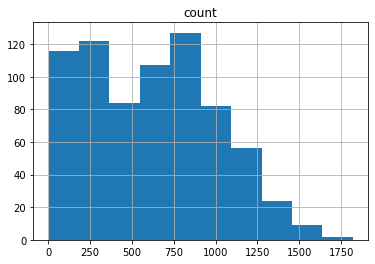

In [13]:
bike.hist('count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336E69B2B0>]],
      dtype=object)

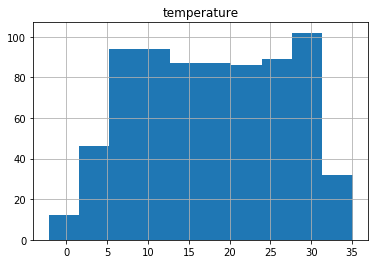

In [14]:
bike.hist('temperature')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336E6191D0>]],
      dtype=object)

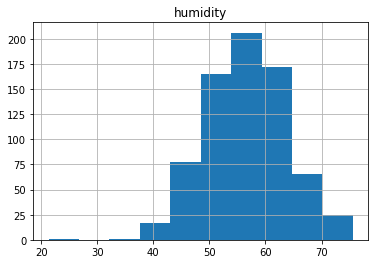

In [15]:
bike.hist('humidity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002336ECB8C50>]],
      dtype=object)

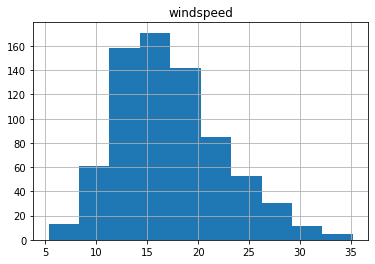

In [16]:
bike.hist('windspeed')

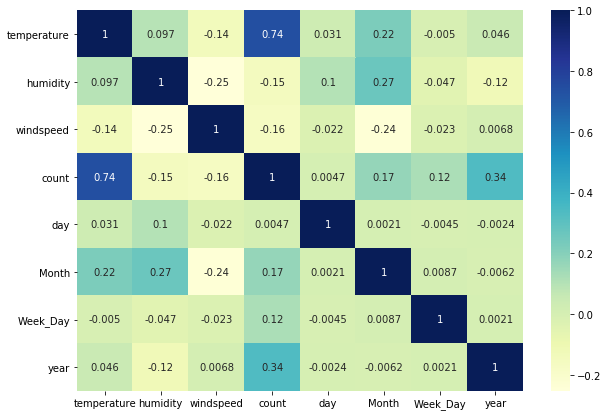

In [17]:
plt.figure(figsize=(10,7))                           
sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')                   #checking correlation using heatmap

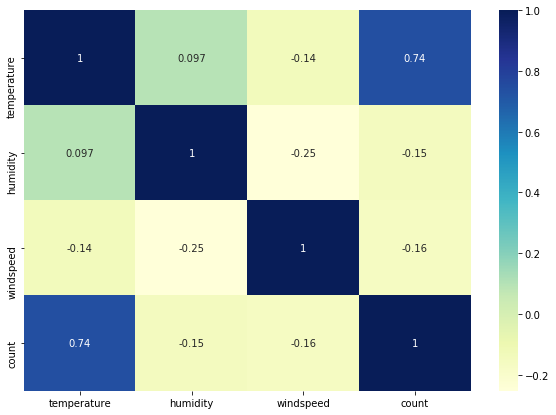

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(bike[['temperature','humidity','windspeed','count']].corr(),annot=True,cmap='YlGnBu')

In [19]:
X = bike[['temperature','humidity','windspeed']]                           #independent variables

In [20]:
y = bike[['count']]                                                        #dependent variables

In [21]:
X.head()                                                                    #top 5 rows of independent variables

,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


In [22]:
y.head()                                                                    #top 5 rows of dependent variables

,count
0,120.0
1,108.0
2,82.0
3,88.0
4,148.0


In [23]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression                                            #importing linear regression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score                  #importing error metrics for regression problem

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)                   #splitting of dataset into training and test set

In [25]:
X_train.shape,y_train.shape                                          #shape of training data

((488, 3), (488, 1))

In [26]:
X_test.shape,y_test.shape                                          #shape of test data

((241, 3), (241, 1))

In [27]:
LR = LinearRegression().fit(X_train,y_train)                             #fitting linear regression

In [28]:
LR_predict = LR.predict(X_test)                                           #predicting values 

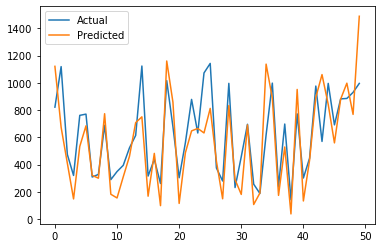

In [29]:
pd.DataFrame({'Actual':LR_predict[:50].flatten(),'Predicted':y_test[:50].values.flatten()}).plot()                #plotting actual and predicting values

In [30]:
print('MAE :',mean_absolute_error(y_test,LR_predict))                         #mean absolute error
print('MSE :',mean_squared_error(y_test,LR_predict))                          #mean squared error
print('RMSE :',np.sqrt(mean_squared_error(y_test,LR_predict)))                #root mean squared error

MAE : 175.33702429069265
MSE : 48218.734856881914
RMSE : 219.58764732307213


In [31]:
print('R square is :',r2_score(y_test,LR_predict))                          #R square

R square is : 0.6525097067684278


In [32]:
import statsmodels.api as sm

In [33]:
x = bike[['temperature', 'humidity', 'windspeed', 'day', 'Month',
       'Week_Day','year']]

In [34]:
x = sm.add_constant(x)                                               #adding constant

In [35]:
print(x)

     const  temperature   humidity  windspeed  day  Month  Week_Day  year
0      1.0     2.716070  45.715346  21.414957    3      1         0  2011
1      1.0     2.896673  54.267219  15.136882    4      1         1  2011
2      1.0     4.235654  45.697702  17.034578    5      1         2  2011
3      1.0     3.112643  50.237349  10.091568    6      1         3  2011
4      1.0     2.723918  49.144928  15.738204    7      1         4  2011
..     ...          ...        ...        ...  ...    ...       ...   ...
724    1.0     5.587201  57.755931  28.678187   27     12         3  2012
725    1.0     5.545775  54.242931  14.792709   28     12         4  2012
726    1.0     4.924888  54.010283  14.777848   29     12         5  2012
727    1.0     4.304001  53.777635  14.762987   30     12         6  2012
728    1.0     3.683114  53.544987  14.748127   31     12         0  2012

[729 rows x 8 columns]


In [36]:
model = sm.OLS(y,x)                                                     #applying ordinary least square method

In [37]:
result = model.fit()

In [38]:
print(result.summary())                                                   #summary of regression model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     242.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):          7.35e-185
Time:                        14:16:31   Log-Likelihood:                -4930.4
No. Observations:                 729   AIC:                             9877.
Df Residuals:                     721   BIC:                             9913.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.298e+05   3.17e+04    -13.566      

here i summary table, p-value for day and month is greater than 0.05. This is not significant.
So, we can eliminate these two features

In [39]:
X1 = bike[['temperature', 'humidity', 'windspeed',
       'Week_Day', 'year']]                                                #independent features (day and month not included)

In [40]:
X1.head()

,temperature,humidity,windspeed,Week_Day,year
0,2.716070,45.715346,21.414957,0,2011
1,2.896673,54.267219,15.136882,1,2011
2,4.235654,45.697702,17.034578,2,2011
3,3.112643,50.237349,10.091568,3,2011
4,2.723918,49.144928,15.738204,4,2011


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
...     X1, y, test_size=0.33, random_state=42)

In [42]:
lin_reg = LinearRegression().fit(X_train,y_train)

In [43]:
lin_prediction = lin_reg.predict(X_test)

In [44]:
print('MAE :',mean_absolute_error(y_test,lin_prediction))
print('MSE :',mean_squared_error(y_test,lin_prediction))
print('RMSE :',np.sqrt(mean_squared_error(y_test,lin_prediction)))      
print('R square is :',r2_score(y_test,lin_prediction))

MAE : 152.50115554605114
MSE : 37780.38869769837
RMSE : 194.37177958154925
R square is : 0.7277340770982033


Now, we got less error values if we comapre it to first ones

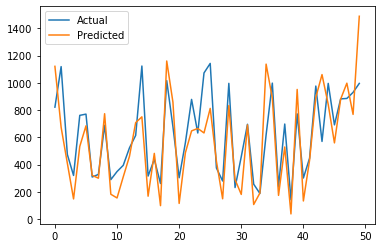

In [45]:
pd.DataFrame({'Actual':LR_predict[:50].flatten(),'Predicted':y_test[:50].values.flatten()}).plot()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor            #importing random forest for regression proble
                                                                                  #importing extra tree regressor to check feature importance

In [103]:
model = ExtraTreesRegressor().fit(x,y)                                    #fitting of extra tree regressor

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


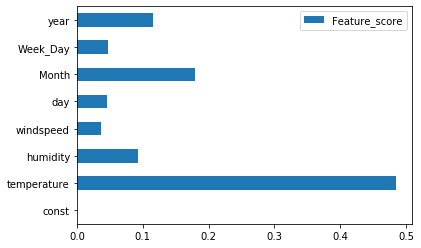

In [114]:
pd.DataFrame({'Feature_score':model.feature_importances_},index=x.columns).plot(kind='barh')             #plot of feature score wrt feature name

In [115]:
new_X = bike[['temperature','humidity','windspeed','day','Month','Week_Day','year']]                 #independent variables
new_X.head()

,temperature,humidity,windspeed,day,Month,Week_Day,year
0,2.716070,45.715346,21.414957,3,1,0,2011
1,2.896673,54.267219,15.136882,4,1,1,2011
2,4.235654,45.697702,17.034578,5,1,2,2011
3,3.112643,50.237349,10.091568,6,1,3,2011
4,2.723918,49.144928,15.738204,7,1,4,2011


In [116]:
y.head()

,count
0,120.0
1,108.0
2,82.0
3,88.0
4,148.0


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
...     new_X, y, test_size=0.33, random_state=42)

In [123]:
RF = RandomForestRegressor().fit(X_train,y_train)                            #fitting radom forest

C:\Users\ADMIN\.conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [124]:
RF_predict = RF.predict(X_test)                                #predicting values

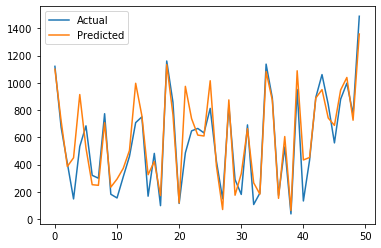

In [125]:
pd.DataFrame({"Actual":y_test[:50].values.flatten(),'Predicted':RF_predict[:50].flatten()}).plot()          #plotting first 50 actual and predicted values

In [126]:
print('MAE :',mean_absolute_error(y_test,RF_predict))
print('MSE :',mean_squared_error(y_test,RF_predict))
print('RMSE :',np.sqrt(mean_squared_error(y_test,RF_predict)))      
print('R square is :',r2_score(y_test,RF_predict))

MAE : 111.1890663900415
MSE : 25182.150659837476
RMSE : 158.6888485679995
R square is : 0.818523796964788


Here, we got minimum error values

## Thank You 